### Library Import

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.sparse.linalg import eigs
from scipy.linalg import LinAlgError, qr, svd

### Data Loading

In [3]:
with open("C://Users//20182667//Documents//Studie//Vakken//Master//Network Statistics//Network_statistics//dimacs10-netscience//out.dimacs10-netscience","r") as f:
    lines = f.readlines()        
with open("C://Users//20182667//Documents//Studie//Vakken//Master//Network Statistics//Network_statistics//dimacs10-netscience//out.dimacs10-netscience","w") as f:
    for line in lines[1:]: f.write(line)

# Create a graph and get rid of the dataset files
G =  nx.read_edgelist("C://Users//20182667//Documents//Studie//Vakken//Master//Network Statistics//Network_statistics//dimacs10-netscience//out.dimacs10-netscience")

## Total Graph analysis

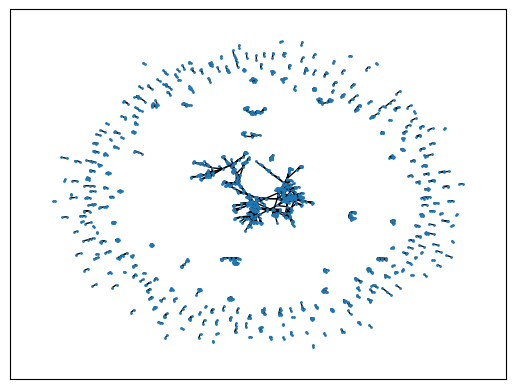

In [7]:
nx.draw_networkx(G, with_labels=False, node_size = 1)

Text(0.5, 1.0, 'Degree Distribution Entire Graph')

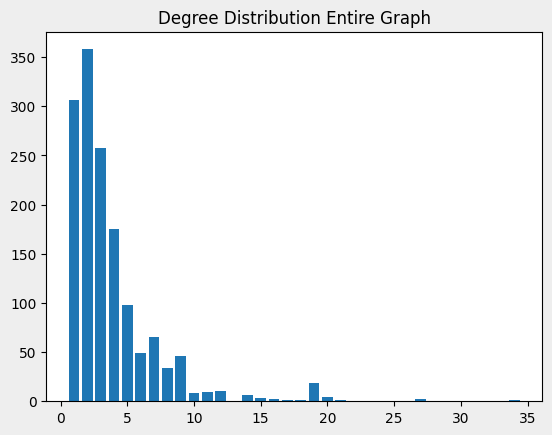

In [8]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
plt.figure(facecolor="#eeeeee")
plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.title("Degree Distribution Entire Graph")

Text(0.5, 1.0, 'Size distribution of connected components')

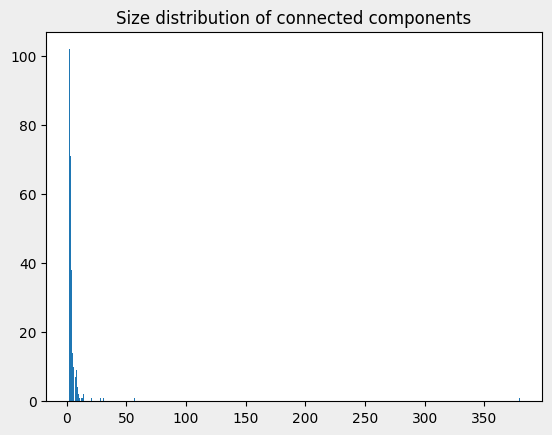

In [9]:
components = list(nx.connected_components(G))
sizes = [len(component) for component in components]
counts = Counter(sizes)

plt.figure(facecolor="#eeeeee")
plt.bar(counts.keys(), counts.values())
plt.title("Size distribution of connected components")

## Largest Components analysis

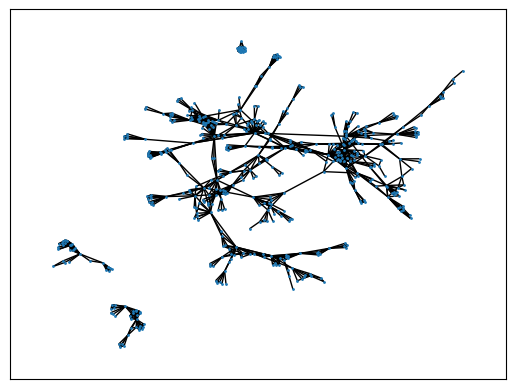

In [10]:
sorted_cc = sorted([component for component in nx.connected_components(G) if len(component)<20] , key=len, reverse=True)
    
for component in sorted_cc:
    # If length of component less than pruning factor remove all this nodes from G 
    for node in component: 
        G.remove_node(node)
adj_mat = nx.to_numpy_array(G)
nx.draw_networkx(G, with_labels=False, node_size = 1)

In [11]:
components = []
for component in nx.connected_components(G):
    component = G.subgraph(list(component))
    components.append(component)

### Component 1

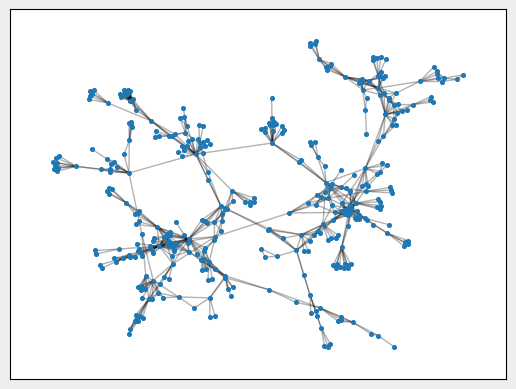

In [18]:
component1= components[0]
fig, ax = plt.subplots()
nx.draw_networkx(component1, with_labels=False, node_size = 7, edge_color=(0,0,0,0.3), pos=nx.spring_layout(component1, seed=3))
fig.set_facecolor('#eeeeee')
plt.show()

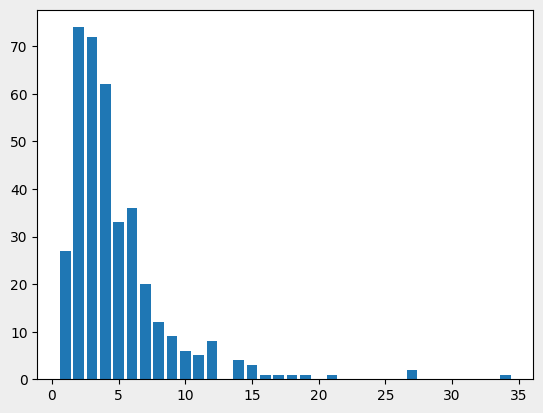

[34, 27, 27, 21, 19, 18, 17, 16, 15, 15, 15, 14, 14, 14, 14, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [19]:
degree_sequence = sorted((d for n, d in component1.degree()), reverse=True)
fig, ax = plt.subplots()
plt.bar(*np.unique(degree_sequence, return_counts=True))
fig.set_facecolor('#eeeeee')
plt.show()
print(degree_sequence)

In [21]:
cliques_component1= [clique for clique in nx.find_cliques(component1) if len(clique) >= 4]
print(cliques_component1)

[['243', '244', '245', '242', '175'], ['846', '566', '847', '849', '850'], ['846', '566', '847', '848'], ['91', '82', '84', '45'], ['91', '82', '84', '916'], ['431', '432', '427', '433', '426', '430', '411', '424'], ['940', '708', '941', '942'], ['564', '396', '565', '563'], ['84', '82', '45', '81', '83'], ['89', '45', '85', '88', '87'], ['283', '282', '284', '204'], ['295', '293', '297', '296', '292', '298'], ['514', '205', '511', '513', '512', '510', '515'], ['989', '286', '988', '85', '285', '87'], ['1347', '1348', '130', '1350', '1349'], ['735', '425', '738', '737'], ['201', '107', '202', '203'], ['269', '371', '373', '372', '374'], ['204', '286', '288', '285'], ['302', '301', '300', '294', '293'], ['108', '102', '110', '109'], ['508', '49', '504', '503', '507', '506', '505'], ['560', '727', '726', '725'], ['208', '486', '489', '493', '487'], ['208', '209', '107', '206', '207'], ['48', '588', '590', '589'], ['48', '51', '49', '41'], ['48', '591', '49', '589'], ['48', '591', '597', 

In [22]:
labels = [5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
 5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,3,3,3,3,3,3,
 3,5,5,5,5,5,5,5,5,5,5,5,0,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
 4,4,4,4,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,4,4,
 4,4,4,4,4,4,0,0,0,0,2,2,2,2,5,5,2,5,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,
 3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,0,0,0,0,1,1,1,1,1,1,1,1,4,4,4,3,3,3,
 3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,2,2,2,2,2,2,2,2,2,2,2,5,5,
 5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2,2,2,2,2,2,5,5,5,5,
 5,5,5,5,5,5,5,5,4,4,4,4,3,3,3,2,2,5,5,5,5,1,4,4,4,4,4,4,4,5,5,3,3,3,3,3,3,
 2,4,4,4,4,4,4,4,4,4,4,5,5,2,2,2,2,2,4,5,5,5,5,5,4,4,4,3,3,3,3,3,3,3,3,3,5,
 5,5,3,3,4,5,5,5,5]

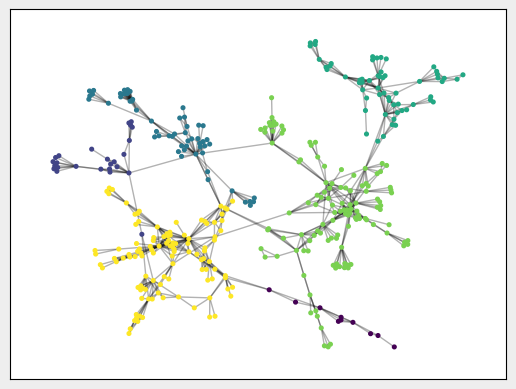

In [23]:
fig, ax = plt.subplots()
nx.draw_networkx(component1, with_labels=False, node_size = 7, edge_color=(0,0,0,0.3), pos=nx.spring_layout(component1, seed=3), node_color=labels)
fig.set_facecolor('#eeeeee')
plt.show()

### Component 2

In [26]:
component2= components[1]
print(component2.nodes)

['163', '643', '151', '639', '156', '145', '161', '147', '164', '160', '144', '162', '148', '157', '153', '154', '642', '165', '155', '149', '158', '637', '641', '159', '638', '167', '166', '146', '640', '152', '150']


31


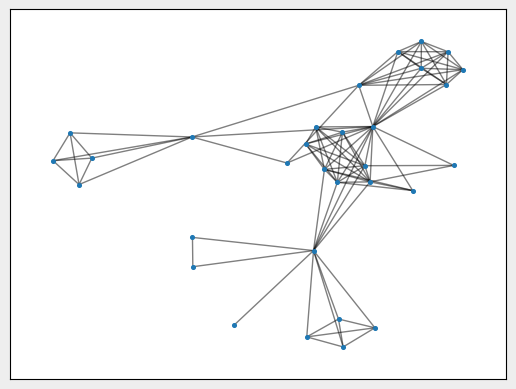

In [17]:
fig, ax = plt.subplots()
nx.draw_networkx(component2, with_labels=False, node_size = 7, edge_color=(0,0,0,0.5), pos=nx.spring_layout(component2, seed=0))
fig.set_facecolor('#eeeeee')
plt.show()

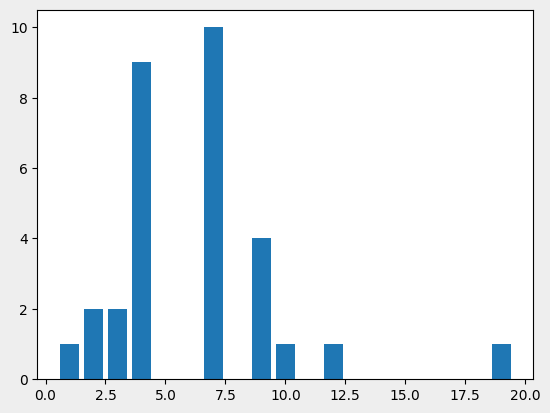

In [13]:
degree_sequence = sorted((d for n, d in components[1].degree()), reverse=True)
fig, ax = plt.subplots()
plt.bar(*np.unique(degree_sequence, return_counts=True))
fig.set_facecolor('#eeeeee')
plt.show()

In [16]:
cliques_component2= [clique for clique in nx.find_cliques(component2) if len(clique) >= 4]
print(cliques_component2)

[['166', '165', '167', '164', '146'], ['643', '642', '640', '641', '148'], ['144', '163', '158', '145', '160', '161', '159', '162'], ['144', '146', '145', '147'], ['144', '150', '153', '155'], ['144', '150', '151', '149', '152'], ['144', '150', '151', '149', '155', '148'], ['144', '150', '151', '149', '155', '157', '156', '154']]


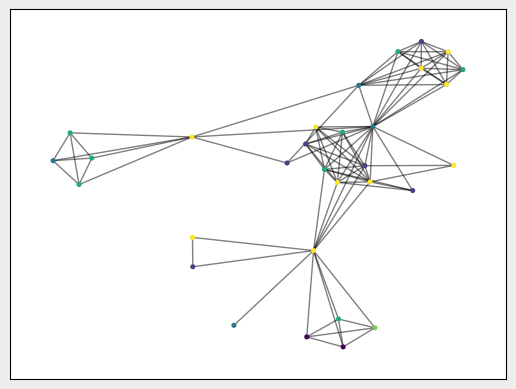

In [15]:
labels = [3, 0, 5, 5, 5, 2, 5, 1, 3, 5, 2, 3, 5, 1, 5, 3, 3, 2, 1, 3, 1, 2, 4, 5, 1, 3, 3, 5, 0, 1, 5]
fig, ax = plt.subplots()
nx.draw_networkx(component2, with_labels=False, node_size = 7, edge_color=(0,0,0,0.5), pos=nx.spring_layout(component2, seed=0), node_color=labels)
fig.set_facecolor('#eeeeee')
plt.show()

### Component 3

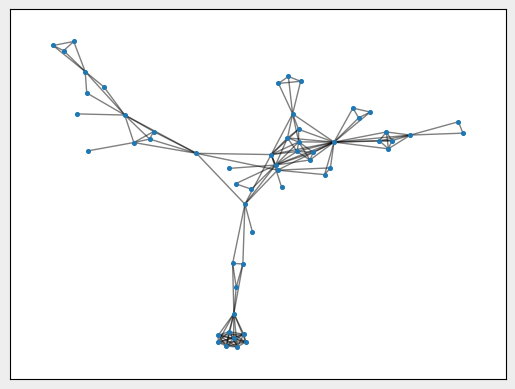

In [66]:
component3,= components[2]
fig, ax = plt.subplots()
nx.draw_networkx(component3, with_labels=False, node_size = 7, edge_color=(0,0,0,0.5), pos=nx.spring_layout(component3, seed=0))
fig.set_facecolor('#eeeeee')
plt.show()

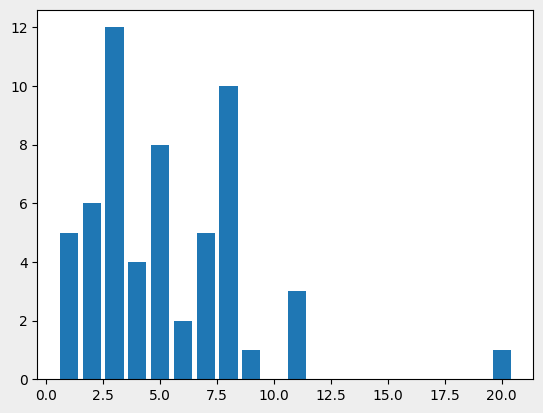

In [73]:
degree_sequence = sorted((d for n, d in components[2].degree()), reverse=True)
fig, ax = plt.subplots()
plt.bar(*np.unique(degree_sequence, return_counts=True))
fig.set_facecolor('#eeeeee')
plt.show()

In [47]:
cliques_component3,= [clique for clique in nx.find_cliques(component3) if len(clique) >= 4]
print(cliques_component3)

[['1237', '1239', '1242', '1236', '1240', '1235', '1238', '1241', '1234'], ['197', '195', '196', '194'], ['532', '548', '545', '546', '547', '542'], ['532', '544', '541', '543'], ['532', '551', '550', '549'], ['532', '531', '534', '533', '538', '535'], ['532', '531', '534', '533', '536', '537'], ['532', '531', '539', '540', '537', '536'], ['795', '792', '793', '198', '794'], ['981', '980', '535', '979'], ['1245', '1236', '1244', '1243'], ['792', '797', '533', '541']]


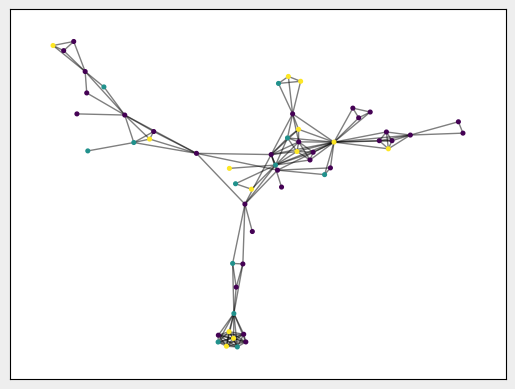

In [127]:
labels = [0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
fig, ax = plt.subplots()
nx.draw_networkx(component3, with_labels=False, node_size = 7, edge_color=(0,0,0,0.5), pos=nx.spring_layout(component3, seed=0), node_color=labels)
fig.set_facecolor('#eeeeee')
plt.show()

### Component 4

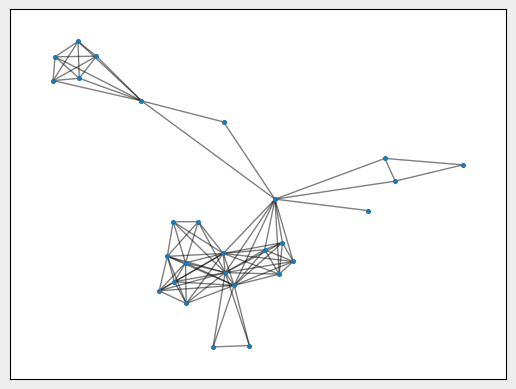

In [71]:
component4,= components[3]
fig, ax = plt.subplots()
nx.draw_networkx(component4, with_labels=False, node_size = 7, edge_color=(0,0,0,0.5), pos=nx.spring_layout(component4, seed=3))
fig.set_facecolor('#eeeeee')
plt.show()

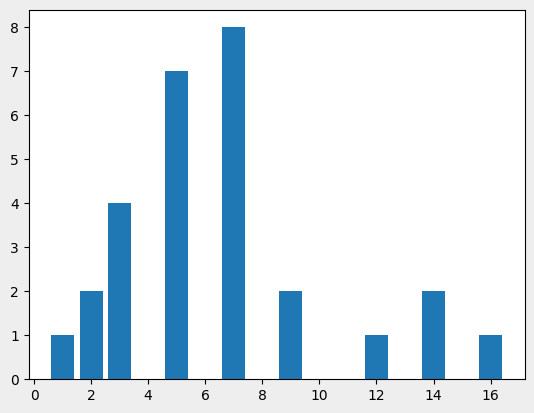

In [74]:
degree_sequence = sorted((d for n, d in components[3].degree()), reverse=True)
fig, ax = plt.subplots()
plt.bar(*np.unique(degree_sequence, return_counts=True))
fig.set_facecolor('#eeeeee')
plt.show()

In [48]:
cliques_component4,= [clique for clique in nx.find_cliques(component4) if len(clique) >= 4]
print(cliques_component4)

[['1428', '1172', '1429', '1430', '1427', '1426'], ['1099', '1100', '1097', '1098', '1095', '1096'], ['1099', '1101', '1096', '1107', '1097', '1098', '1106', '1108'], ['1099', '1101', '1096', '1105', '476', '1104', '1102', '1103'], ['1099', '1101', '1109', '1110']]


### Dummy eigenvalue plot

Text(0.5, 1.0, 'Example Eigenvalue Plot')

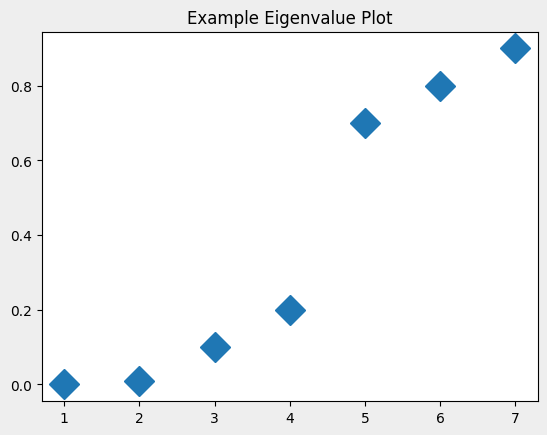

In [60]:
dummy_x = [1,2,3,4,5,6,7]
dummy_y = [0,0.01,0.1,0.2,0.7,0.8,0.9]
plt.figure(facecolor="#eeeeee")
plt.plot(dummy_x,dummy_y, marker="D",markersize=15,linewidth=0)
plt.title("Example Eigenvalue Plot")